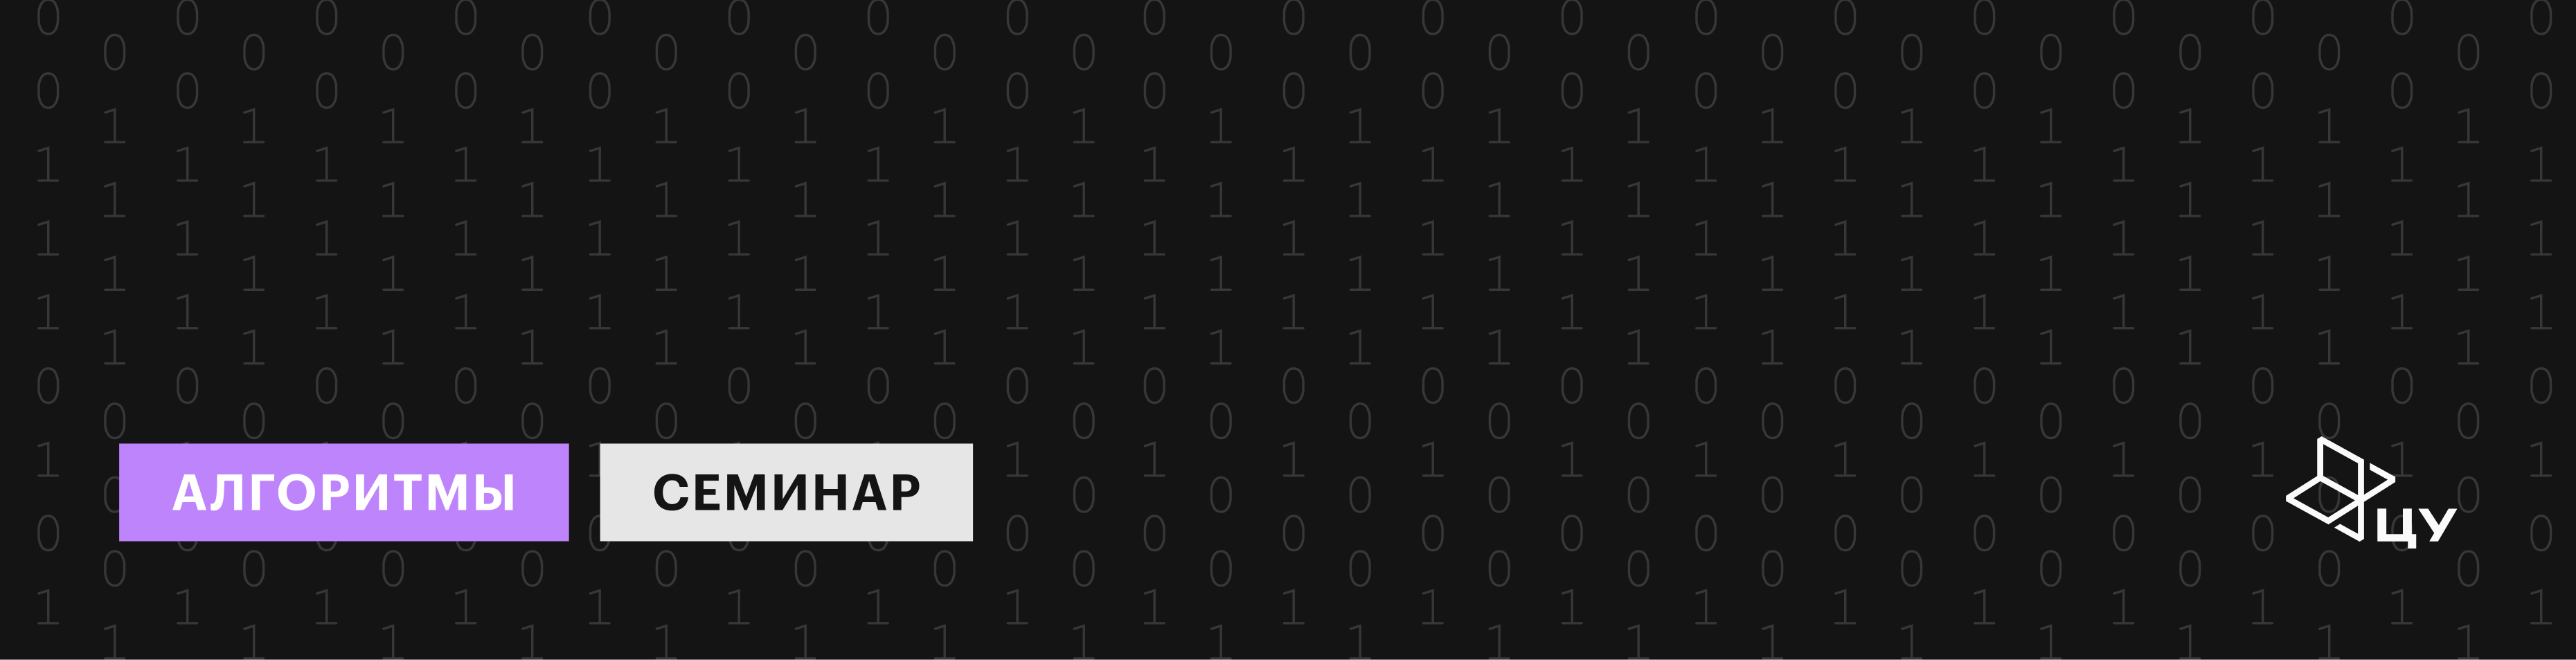

Сегодня быстро пробежимся по базовым инструментам, которые понадобятся в ближайших задачах. Тут нет ничего сложного, но именно эти конструкции составляют фундамент почти всех алгоритмических решений.

# 1. Разминка

## Задача A - Middle value of triple

**Что нужно:** по трём числам вернуть медиану.

Постарайтесь написать задачу максимально коротко

Ссылка: https://contest.yandex.ru/contest/86389/problems/A/

In [9]:
def get_middle_value(a: int, b: int, c: int) -> int:
    """
    Takes three values and returns middle value.
    """
    return sorted([a,b,c])[1]

def get_middle_value2(a: int, b: int, c: int) -> int:
    """
    Takes three values and returns middle value.
    """
    if a >= b:
        if b >= c:
            return b
        if c >= a:
            return a 
    else:
        if a >= c:
            return a
        if c >= b:
            return b
    return c
    
print(get_middle_value2(1,5,3))

3


In [10]:
%timeit get_middle_value(5, 9, 3)
%timeit get_middle_value2(5, 9, 3)

314 ns ± 2.17 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
55.6 ns ± 1.09 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


# 2. Recap: 3 кита алгоритмического программирования

## 2.1. lists: массивы элементов

Список - упорядоченная коллекция элементов.

Создание

```python
a = [1, 5, 3]
b = []
```

Доступ по индексу

```python
x = a[0]
a[1] = 10
```

Полезные операции:

* `len(a)` - длина списка;
* `a.append(x)` - добавить элемент;
* `a + b` - конкатенация;
* `a[i:j]` - срез;
* `min(a)`, `max(a)`;
* `sum(a)`.


Помним, что список - динамический массив, а значит

| Операция                | Сложность |
|-------------------------|-----------|
| a[i]                    | O(1)      |
| a.append(x)             | O(1)*     |
| a.pop()                 | O(1)      |
| a.insert(0, x)          | O(n)      |
| a.pop(0)                | O(n)      |
| x in a                  | O(n)      |

(*) амортизированная

In [ ]:
a = [1, 2, 3, 4, 5]

print(a[2])        # Доступ по индексу
a.append(6)        # Добавление в конец
a.pop()            # Удаление с конца
a.insert(0, 100)   # Дорогая операция
print(a)



Таким образом, `insert` и `pop(0)` - почти всегда плохая идея в алгоритмах.

### list comprehension (как писать «по-питоновски»)



In [12]:
a = [1, 2, 3, 4, 5, 6]

# Вместо цикла
evens = [x for x in a if x % 2 == 0]
squares = [x * x for x in a]

print(evens)
print(squares)

[2, 4, 6]
[1, 4, 9, 16, 25, 36]


In [11]:
# Вложенные comprehension
matrix = [[i * j for j in range(3)] for i in range(3)]
print(matrix)

[[0, 0, 0], [0, 1, 2], [0, 2, 4]]



## 2.2 Поиск, вставка, удаление: где list - плохой выбор?



### Линейный поиск


In [1]:
a = list(range(1_000_000))

# Проверка наличия элемента в списке
print(999_999 in a)   # O(n)

True



Вывод:
- list хорош для перебора и индексации;
- list плох для частых проверок «содержится ли».


## Задача B - Merge lists


**Что нужно:** слить два отсортированных списка в один отсортированный.

**Идея решения:**
- `i` по `lst_a`, `j` по `lst_b`,
- на каждом шаге кладём меньший из `lst_a[i]` и `lst_b[j]`,
- когда один список кончился - дописываем остаток второго.

**Сложность:** O(n + m), память O(n + m).

In [2]:
def merge_iterative(lst_a: list[int], lst_b: list[int]) -> list[int]:
    """
    Merge two sorted lists in one sorted list
    :param lst_a: first sorted list
    :param lst_b: second sorted list
    :return: merged sorted list
    """
    i = 0
    j = 0
    result = []
    while (i < len(list_a)) and (j < len(list_b)):
        if list_a[i] <= list_b[j]:
            result.append(list_a[i])
            i += 1
        else:
            result.append(list_b[j])
            i += j
    
    if i < len(list_a):
        result.extend(list_a[i:])
    if j < len(list_b):
        result.extend(list_b[j:])

    return result
    
list_a = [1,3,5,7]
list_b = [1,2,5,6,7,8,9,10]


In [ ]:
print(merge_iterative(list_a, list_b))

Ссылка: https://contest.yandex.ru/contest/86389/problems/B/

## Задача C - Filter list by list



**Что нужно:** из первого отсортированного списка убрать элементы, которые встречаются во втором (тоже отсортированном).

**Идея решения (два указателя):**
- идём по `lst_a` индексом `i` и по `lst_b` индексом `j`,
- если `lst_a[i] < lst_b[j]` - элемент точно «лишний» во втором не встретится $\rightarrow$ оставляем и двигаем `i`,
- если `lst_a[i] == lst_b[j]` - выкидываем этот элемент и двигаем оба,
- если `lst_a[i] > lst_b[j]` - второй список «отстаёт» $\rightarrow$ двигаем `j`.

**Сложность:** O(n + m), память O(1) кроме ответа.

Ссылка: https://contest.yandex.ru/contest/86389/problems/C/


In [6]:
def filter_list_by_list(lst_a: list[int] | range, lst_b: list[int] | range) -> list[int]:
    """
    Filter first sorted list by other sorted list
    :param lst_a: first sorted list
    :param lst_b: second sorted list
    :return: filtered sorted list
    """
    i = 0
    j = 0
    result = []
    while (i < len(lst_a)) and (j < len(lst_b)):
        if lst_a[i] < lst_b[j]:
            result.append(lst_a[i])
            i += 1
        elif lst_a[i] == lst_b[j]:
            i += 1
            j += 1
        else:
            j += 1

    while (i < len(lst_a)):
        result.append(lst_a[i])
        i += 1

    return result

list_a = [1,3,5,7]
list_b = [1,2,5,6,7,8,9,10]
print(filter_list_by_list(list_a, list_b))
            

[3]


## Задача D - Максимальная сумма подмассива размера k

**Тема:** скользящее окно фиксированной длины.

**Идея решения:**
- Давайте посчитаем сумму первых `k` элементов - назовем их окном,
- дальше «сдвигаем окно» на 1:
  - добавляем новый элемент справа,
  - вычитаем элемент, который вышел слева,
- поддерживаем максимум среди всех окон.

**Сложность:** O(n), память O(1).

Ссылка: https://contest.yandex.ru/contest/86389/problems/D/


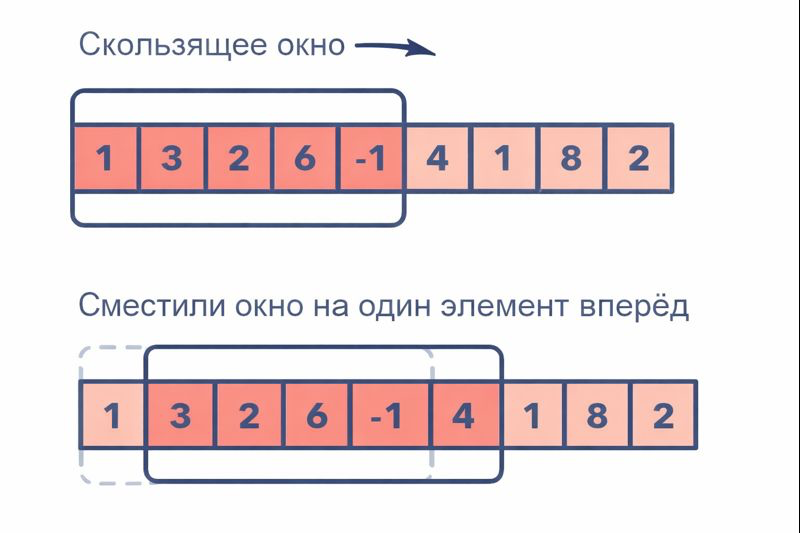

In [5]:
def max_subarray_sum_k(nums: list[int], k: int) -> int:
    """
    Return the maximum sum of any contiguous subarray of length k.
    """
    result = 0
    i = 0
    while (i + k) <= len(nums):
        result = max(result, sum(nums[i:i+k]))
        i += 1

    return result

list_b = [1,2,5,6,7,8,9,10]
max_subarray_sum_k(list_b, 3)

27

In [2]:
list_b = [1,2,5,6,7,8,9,10]
list_b[5:8]

[8, 9, 10]

## 2.3. set: когда важна скорость поиска


1. Не упорядочены.
2. Не содержат дубликатов.
3. Обеспечивают быстрый поиск элемента в контейнере.

In [ ]:
a = [1, 2, 3, 4, 5, 5, 5]
s = set(a)

print(s)
print(3 in s)   # O(1)

In [ ]:
b = {3, 4, 5, 6}

print(s | b)  # Объединение
print(s & b)  # Пересечение
print(s - b)  # Разность

## Задача E - Cчастливое число Слевина



Давайте смоделируем процесс. Будем на каждом шаге заменять число суммой квадратов его цифр.

Ключевая проблема - понять, что делать, если до 1 мы не дошли. Здесь помогает наблюдение: возможны только два исхода:
1) мы рано или поздно попадём в `1`
$\rightarrow$ число счастливое;
2) мы начнём повторять уже встречавшееся значение $\rightarrow$ значит, попали в цикл $\rightarrow$ число несчастливое.

Чтобы надёжно отличать эти случаи, храним все промежуточные значения в множестве `seen`.
- Перед переходом проверяем: если текущее число уже в `seen`, то цикл найден $\rightarrow$ `false`.
- Иначе добавляем в `seen` и делаем шаг.
- Если получили `1`, сразу отвечаем `true`.

Почему это работает быстро: за $O(1)$ в среднем проверяем каждое число, а числа очень быстро уменьшаются до небольших значений, потому что сумма квадратов цифр ограничена (для $n \le 10^6$ максимум $6 \cdot 9^2 = 486$ (если $n = 999999$), после чего процесс либо приходит к 1, либо зацикливается.

Ссылка: https://contest.yandex.ru/contest/86389/problems/E/


In [ ]:
def sum_square_digits(x: int) -> int:
    s = 0
    while x > 0:
        d = x % 10
        s += d * d
        x //= 10
    return s


def is_happy(n: int) -> bool:
    seen = set()
    while n != 1 and n not in seen:
        seen.add(n)
        n = sum_sq_digits(n)
    return n == 1

## 2.4. dict: ассоциативные массивы

Словари и типичные паттерны

In [ ]:
words = ["apple", "banana", "apple", "orange", "banana", "apple"]

cnt = {}
for w in words:
    cnt[w] = cnt.get(w, 0) + 1

print(cnt)

In [ ]:
# перебор словаря
for key, value in cnt.items():
    print(key, value)


Friendly reminder: используй `get`, `items`, не забывай отсутствие порядка как логического свойства.

## Задача F - Two Sum



**Тема:** хеш-таблица для дополнений.

**Идея решения:**
- идём слева направо по массиву,
- для текущего `x` ищем, встречали ли мы раньше число `target - x`,
- если да - ответ найден (пара),
- если нет - запоминаем `x` (обычно как `value -> index`).

**Сложность:** O(n) по времени, O(n) по памяти.

Ссылка: https://contest.yandex.ru/contest/86389/problems/F/


In [6]:
def two_sum(nums: list[int], target: int) -> tuple[int, int] | None:
    """
    Return indices of two numbers that add up to target, or None.
    """
    pos: dict[int, int] = {}
    
    for i, x in enumerate(nums):
        need = target - x
        if need in pos:
            return (pos[need], i)
        pos[x] = i
    
    return None


## Задача G - Первый неповторяющийся символ в строке



**Тема:** частоты через `dict` + второй проход.

**Идея решения:**
1) пройти по строке и посчитать частоты каждого символа,
2) пройти по строке ещё раз слева направо и вернуть первый символ с частотой 1.

**Сложность:** O(n) время, O(алфавит) память (или O(n) в худшем).

Ссылка: https://contest.yandex.ru/contest/86389/problems/G/


In [8]:
def first_unique_char(s: str) -> int:
    """
    Return index of the first non-repeating character, or -1.
    """
    chars: dict[str, int] = {}

    for char in s:
        chars[char] = chars.get(char, o) + 1
    for i, char in enumerate(s):
        if chars[char] == 1:
            return i

    return -1



## Задача H - Количество пар с суммой, кратной K



**Тема:** подсчёт остатков (mod K) через частоты.

**Идея решения:**
- считаем остаток `r = x % K` для каждого числа,
- хотим пары остатков `(r, (K - r) % K)`,
- удобно идти по числам слева направо:
  - для текущего `r` добавить к ответу, сколько раз уже встречался комплементарный остаток,
  - затем увеличить частоту `r`.

**Сложность:** O(n) время, O(K) память.

Ссылка: https://contest.yandex.ru/contest/86389/problems/H/


In [9]:
def count_pairs_divisible_by_k(nums: list[int], k: int) -> int:
    """
    Count pairs (i < j) such that (nums[i] + nums[j]) % k == 0.
    """
    freq = [0] * k
    ans = 0
    for x in nums:
        r = x % k
        comp = (-r) % k
        ans += freq[comp]
        freq[r] += 1
    return ans



# 3. Метод двух указателей

## 3.1 Почему это работает



В некоторых задачах выше нам пришлось перебирать **пары** или **границы подотрезка**. Наивный вариант - двойной цикл \(O(n^2)\). Два указателя дают линейный проход, потому что на каждом шаге мы принимаем *обоснованное* решение, **какую границу двигать**, и тем самым отбрасываем целый класс вариантов.

Интуиция: держим позиции `l` и `r`, смотрим на текущие элементы и используем структуру данных:
- если данные упорядочены, сравнение на границах даёт **монотонность**, поэтому часть вариантов можно смело выкинуть;
- если данные не отсортированы, мы поддерживаем **инвариант** (условие на текущий отрезок) и двигаем границы так, чтобы он сохранялся.

Каждый указатель двигается в одну сторону и хотя бы один из них пройдет по каждому элемент, значит суммарная асимптотика \(O(n)\).


## 3.2 Скользящее окно: частный случай двух указателей



Скользящее окно - это тот же метод двух указателей, где `l` и `r` задают текущее окно `[l..r]`. Мы **не пересчитываем всё заново**, а обновляем состояние окна при сдвиге границ.

Правило движения:
- двигаем `r` вперёд, добавляя новый элемент в окно;
- если окно стало «плохим» (условие нарушилось), двигаем `l`, пока оно снова не станет «хорошим».

Почему это \(O(n)\): каждый элемент **входит** в окно максимум один раз (через `r`) и **выходит** максимум один раз (через `l`), а состояние окна (сумма/частоты/set) обновляется за \(O(1)\).

Обычно встречаются два режима:
- **фиксированная длина** (например, ровно `k`): окно просто «едет»;
- **переменная длина** (под условие): `r` расширяет, `l` сужает, чтобы восстановить инвариант.


In [ ]:
def contains_nearby_duplicate(nums: list[int], k: int) -> bool:
    pass

## Задача I - Дубликаты в пределах расстояния k

**Тема:** два указателя

**Идея решения**

Нужно понять, встречался ли текущий элемент **среди последних \(k\)** элементов массива.
Если да - есть пара одинаковых значений на расстоянии \(\le k\).

Держим «скользящее окно» по индексам длины \(k\) и множество значений в этом окне:
- идём слева направо по `nums`,
- если `nums[i]` уже в `seen`, значит такой же элемент есть в текущем окне $\rightarrow$ расстояние между индексами \(\le k\) $\rightarrow$ ответ `true`,
- иначе добавляем `nums[i]` в `seen`,
- если окно стало больше \(k\), удаляем из `seen` элемент `nums[i-k]` (он выходит за допустимое расстояние).

Почему это \(O(n)\): каждый элемент добавляется в множество один раз и удаляется один раз, операции `in/add/remove` в среднем \(O(1)\).

Ссылка: https://contest.yandex.ru/contest/86389/problems/I/

## Задача J - Подстрока с максимальным количеством уникальных символов


**Тема:** два указателя + хеш-таблица в окне (sliding window).

**Идея решения:**
- держим окно `[l..r]` и структуру (set или dict), которая говорит, какие символы сейчас в окне,
- расширяем `r`,
- если добавление ломает уникальность (символ уже был), сдвигаем `l`, пока окно снова не станет корректным,
- на каждом шаге обновляем ответ длиной окна.

**Сложность:** O(n), потому что каждый указатель двигается только вперёд.

Ссылка: https://contest.yandex.ru/contest/86389/problems/J/

In [ ]:
def max_unique_substring_len(s: str) -> int:
    """
    Return length of the longest substring with all unique characters.
    """
    pass


# 4. Friendly reminder: что не обсудили, а стоило бы

## Ссылочная семантика

`list`, `dict`, `set` - **mutable** объекты, при передаче в функцию можно случайно изменить исходные данные.

Если нужно «не трогать оригинал» - делайте копию.

In [ ]:
def f(a):
    a.append(100)  # Изменяем переданный список

x = [1, 2, 3]
f(x)  # Передаём список в функцию

print(x)

In [ ]:
# Как избежать
def g(a):
    a = a.copy()
    a.append(100)
    return a

y = [1, 2, 3]
z = g(y)

print(y)
print(z)

## Форматирование строк (f-strings)

Это самый удобный способ печатать ответы в задачах, особенно когда нужны округления/формат.

- `{x}` - подставить значение  
- `{y:.2f}` - число с 2 знаками после точки


In [ ]:
x = 10
y = 3.14159

print(f"x = {x}, y = {y:.2f}")

In [ ]:
# Часто требуется в задачах
ans = 123.456789
print(f"{ans:.3f}")